Record yourself singing for 5 seconds with some background noise. Describe all audible background noises in your recording. Denoise the recorded audio using fast Fourier transform. Determine the best threshold value to filter out the noise. Plot the resulting signal and the original noisy signal in one figure. Compare. Were you able to successfully remove all audible background noises?

# Import the libraries and modules that will be used

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf

Objectives:


1.   Use FFT to denoise a simple noisy data (which is just a sum of two sine waves with some random noise) to demonstrate how are we going to use FFT and inverse FFT to filter out noise
2.   Apply to a real recorded Audio data which is recording myself singing with some background noise




# 1.) Use FFT to Denoise a Simple Noisy Signal Data

Suppose we first consider the sum of two Sine waves:

$f_1$ = $sin(2\pi(60)t)$

$f_2$ = $sin(2\pi(150)t)$

and the we apply some random noise $numpy.random.randn()$ and use FFT to denoise this signal

In [41]:
##Create a Simple Signal with some Noise

fs = 1000 # sampling frequency or rate in Hz (samples per second)
dt = 1/fs
t = np.arange(0, 1, dt) # time domain

# dt = 0.001
# t = np.arange(0,5,dt);
f1 = np.sin(2*np.pi*60*t);
f2 = np.sin(2*np.pi*150*t);
ftrue  = f1 + f2 ##Sum of two frequencies

##Create the noise
noise = 3*np.random.randn(len(t));
fnoise = ftrue + noise

In [42]:
Audio(fnoise,rate=1000)

## Plot of Noisy Signal versus True Signal

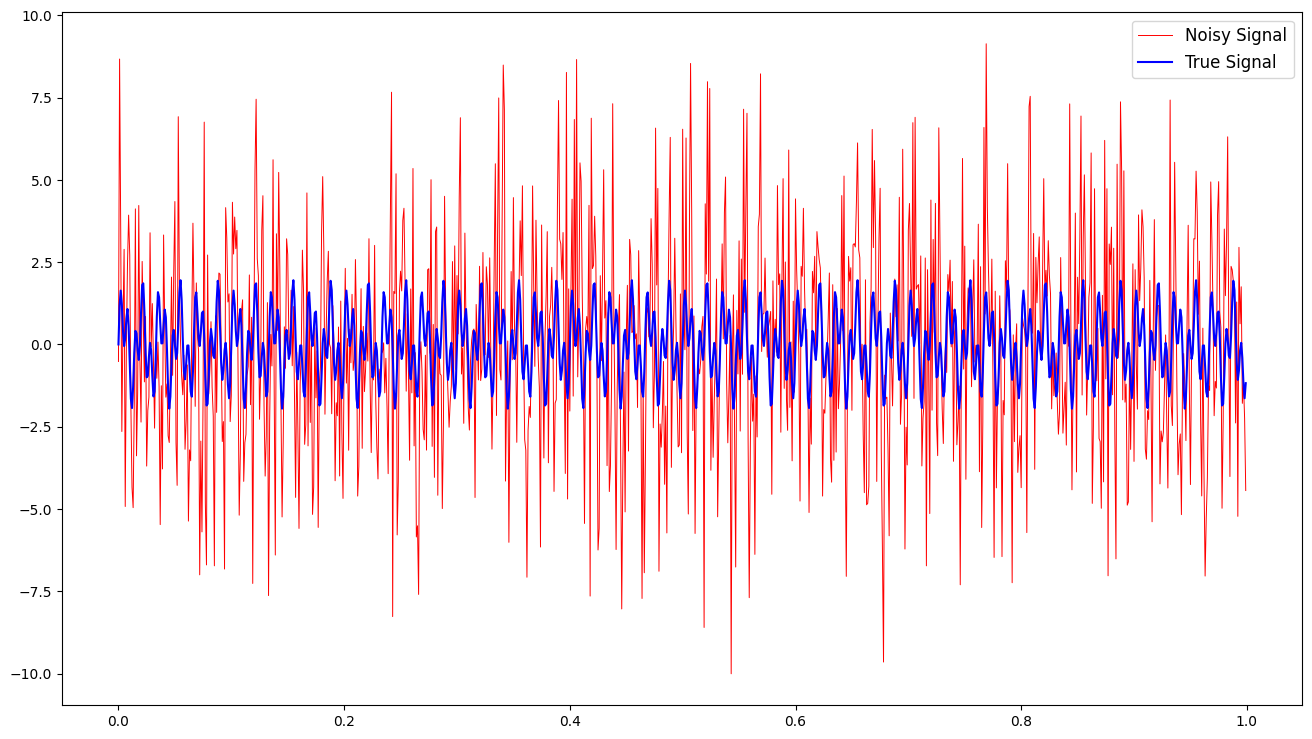

In [43]:
#plot the Noisy Signal and the True Signal
fig, axes = plt.subplots(figsize=(16,9))
axes.plot(t,fnoise,"r",label="Noisy Signal",linewidth=0.7)
axes.plot(t,ftrue,"b",label="True Signal")
plt.legend(fontsize=12)
plt.show()

## Using PSD for filtering Noise or denoising

The Power Spectral Density (PSD) is a measure that describes how the power of a signal is distributed across different frequencies. In the context of a one-dimensional signal, such as an audio signal, the PSD represents the distribution of power as a function of frequency. The PSD is often calculated using the Fourier Transform. Given a time-domain signal $(x(t))$, the PSD, denoted as $(S(f))$ or $(P(f))$, is calculated by taking the square of the magnitude of the Fourier Transform of the signal:

$$
S(f) = \lvert X(f) \rvert^2
$$

Here, $(X(f))$ is the Fourier Transform of the signal $(x(t))$, and $(f)$ is the frequency. The PSD provides information about the strength of the signal at different frequencies.

Suppose we have data $f$ from our Time series domain and we perform Fast Fourier Transform:

$$
{f} \xrightarrow{\text{FFT}} \hat{f}
$$

$\hat{f}$ is a vector or an array that contains complex numbers. So we can think PSD as some sort of,

Let $\lambda$ = $a+bi$ it follows that $\overline{\lambda}$ = $a-bi$ where $i$ is an imaginary number such that $i^{2}$ = $-1$. Furthermore, $\lambda \overline{\lambda}$ = $\lvert \lambda \rvert^2$ = $a^{2} + b^{2}$.

So in python we can use:

$$
PSD = (fhat * numpy.conj(fhat) / n)
$$

To get the Power Spectral Density at each frequency. We can choose a particular threshold in among the PSD values to filter out the frequency that we just need.

Then we can use inverse Fast Fourier Transform $numpy.fft.ifft()$ to transform it back to our Time series domain and check out filtered signal

In [44]:
##Compute Fast Fourier Transform
n = len(t);
fhat = np.fft.fft(fnoise,n); ##perform FFT on the noisy data

##Power Spectral Density
##Calculate the PSD
PSD = (fhat * np.conj(fhat) / n).real;

##Create x-axis of frequencies
# freq = 1/(dt*n) * np.arange(0,n);
freq = np.fft.fftfreq(n, d=dt)
L = np.arange(1,np.floor(n/2),dtype=int);

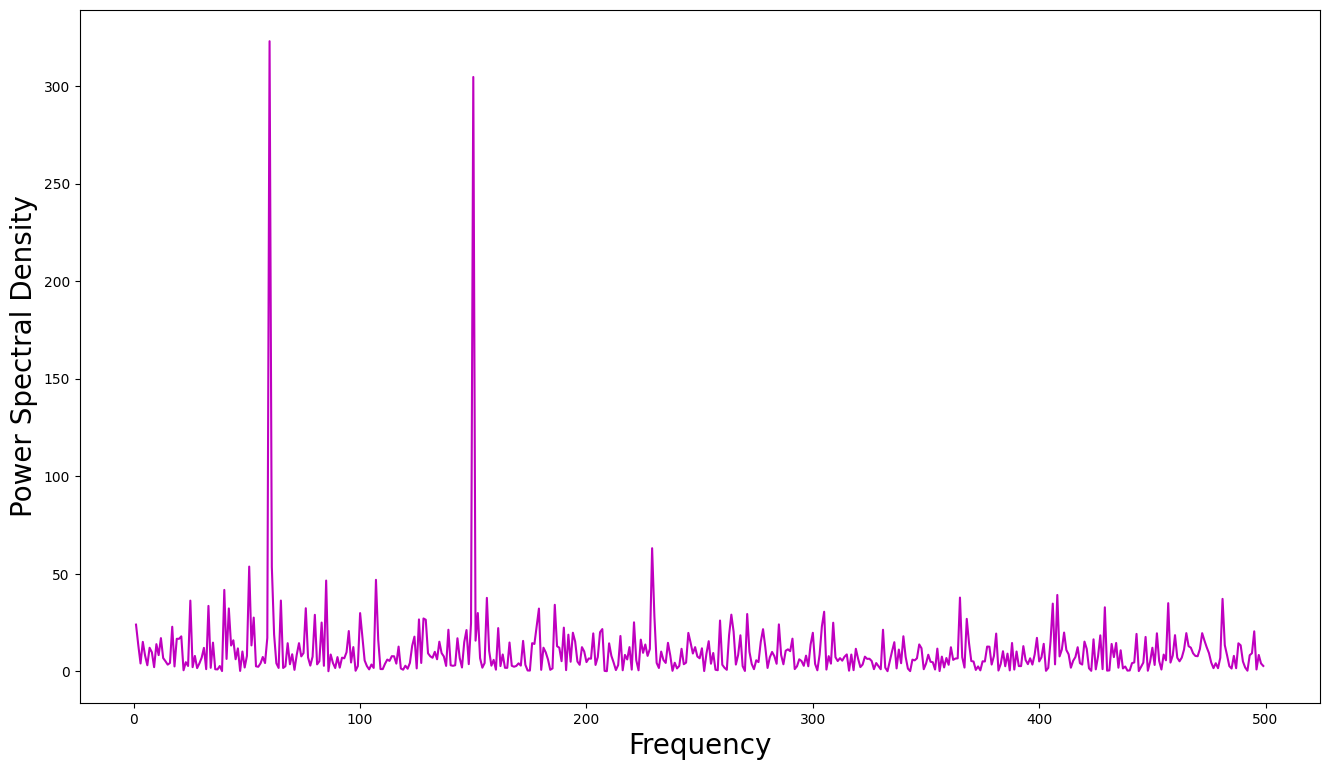

In [45]:
##Plot the Power Spectral Density
fig, axes = plt.subplots(figsize=(16,9))
axes.plot(freq[L],PSD[L],"m")
# axes.set_xlim(100, 510)#
axes.set_xlabel(f"Frequency",fontsize=20)
axes.set_ylabel(f"Power Spectral Density",fontsize=20)
plt.show()

Analyzing from the graph and we can see that the values below the 60 from the Power Spectral Density (PSD) is just noise. We can try to remove the noise by if we zero out the values $PSD < 60$ and retain $PSD \geq 60$

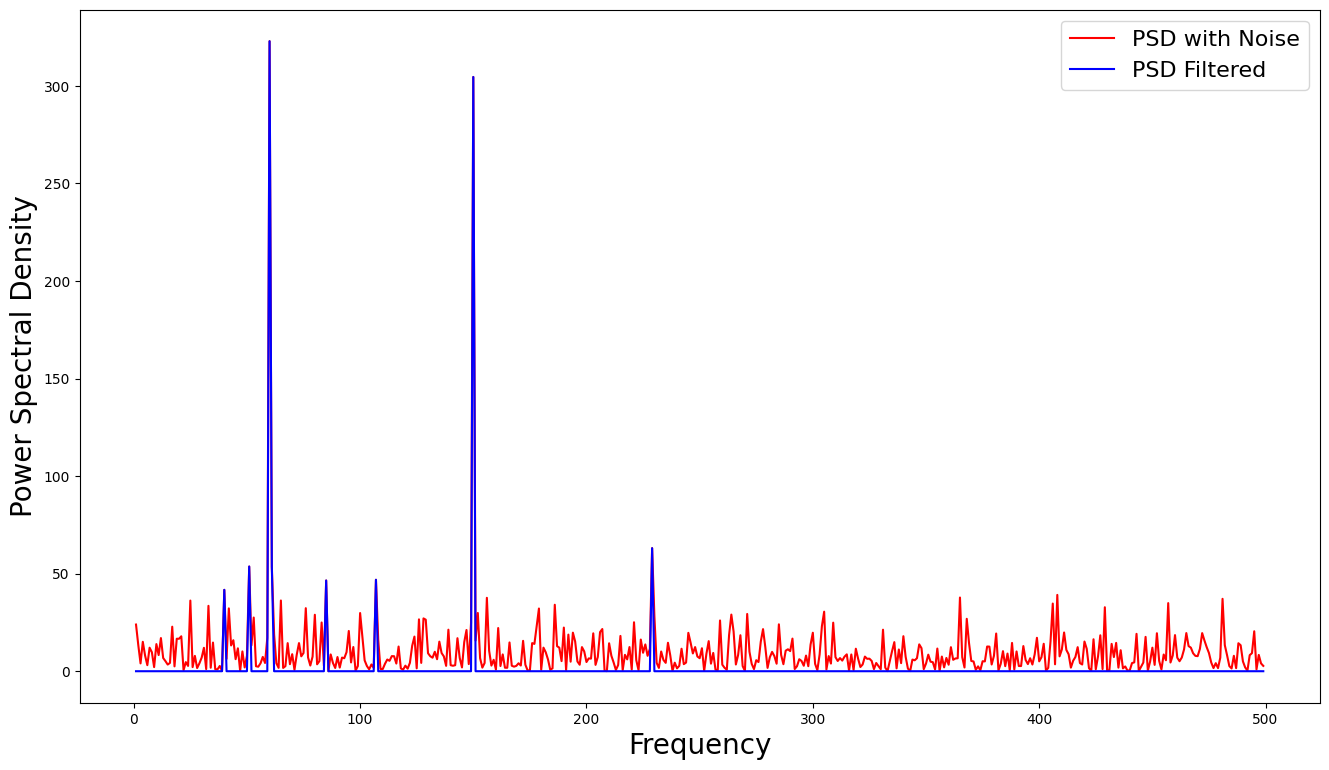

In [51]:
index = PSD >= 40
PSDfiltered = PSD * index

##Recover the filtered signal using inverse FFT
fhatfiltered = fhat * index
ffiltered = np.fft.ifft(fhatfiltered).real;

#Plot the Filtered PSD against the PSD with noise
plt.subplots(figsize=(16,9))
plt.plot(freq[L],PSD[L],color="red",label="PSD with Noise")
plt.plot(freq[L],PSDfiltered[L],color="blue", label="PSD Filtered")
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("Power Spectral Density",fontsize=20)
plt.legend(fontsize=16)
plt.show()

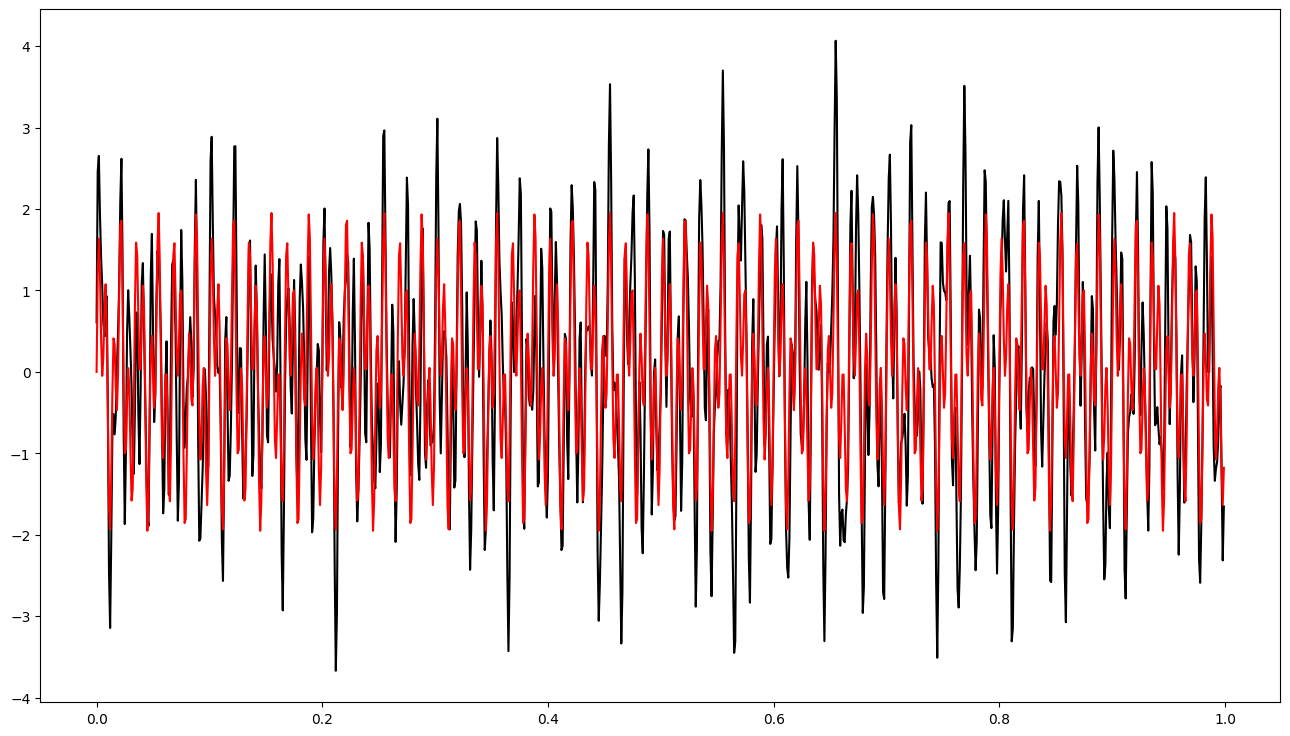

In [52]:
##Plot the True Signal Against the Filtered signal
plt.subplots(figsize=(16,9))
plt.plot(t,ffiltered,color="k")
plt.plot(t,ftrue,color="red")

plt.show()

# 2.) Denoise actual Audio Data

## Import Audio Data

Now we will try to use FFT to denoise actual audio data with the assistance of librosa module

In [ ]:
##Load Actual Audio Data
data, sr = librosa.load("MySample.wav",sr=44100)
y = librosa.util.normalize(data) ##nomalize the data
# Time step
dt = 1 / sr


### Extract a 5-second segment of the audio and play the audio

In [ ]:
# Extract a 5-second segment of the audio
duration = 5  # in seconds
start_time = 0  # start time in seconds
end_time = start_time + duration
yraw = y[int(start_time * sr):int(end_time * sr)]

##Acquire the time for the plotting of the Time series domain
time = np.arange(0,len(yraw))/sr
# Display audio widget for playback
rawaudio1 = Audio(data=yraw, rate=sr)
display(rawaudio1)

### Describing the Audible Sounds heard from the audio segment

Audible sounds that can be noticed from the loaded audio are the following:

1.) My Singing Voice

2.) Some "gigil kid" voice

## Plotting the Audio Signal Imported

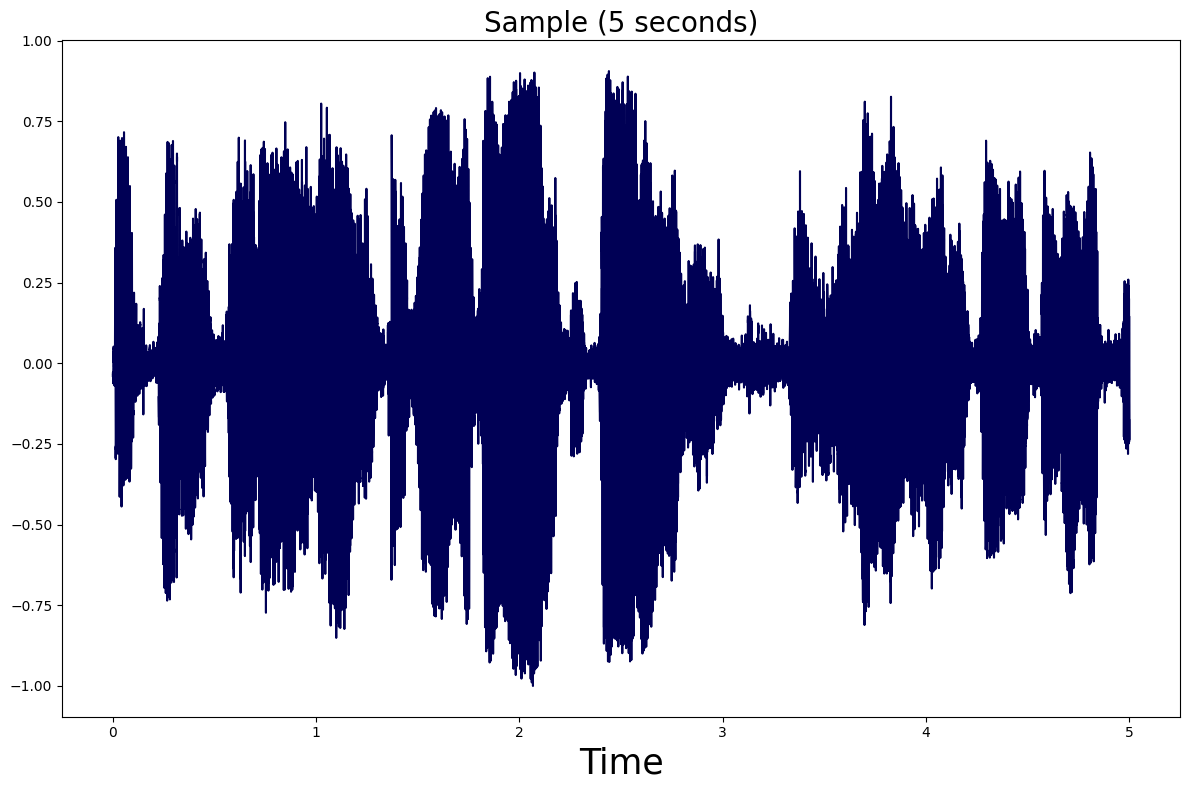

In [ ]:
# Plotting the Audio Signal
fig, axs = plt.subplots(figsize=(12, 8))

# Plot the audio signal
axs.plot(time,yraw,color="#000055")
axs.set_title('Sample (5 seconds)',fontsize=20)
axs.set_xlabel("Time",fontsize=25)
plt.tight_layout()
plt.show()

### Compute the FFT of the audio signal, PSD, Frequency and do inverse FFT

In [ ]:
# Compute the Fast Fourier Transform (FFT) of the audio signal
n = len(yraw)
fhat = np.fft.fft(yraw, n)
##Power Spectrum Density
PSD = (fhat * np.conj(fhat) / n).real;
# freq = 1 / (dt * n) * np.arange(0, n)
freq = np.fft.fftfreq(n, d=dt); ## Acquire Frequency for plotting the PSD
L = np.arange(1, np.floor(n/2), dtype=np.int32) ##Will be used to plot only the first half

### Plot the Power Spectral Density

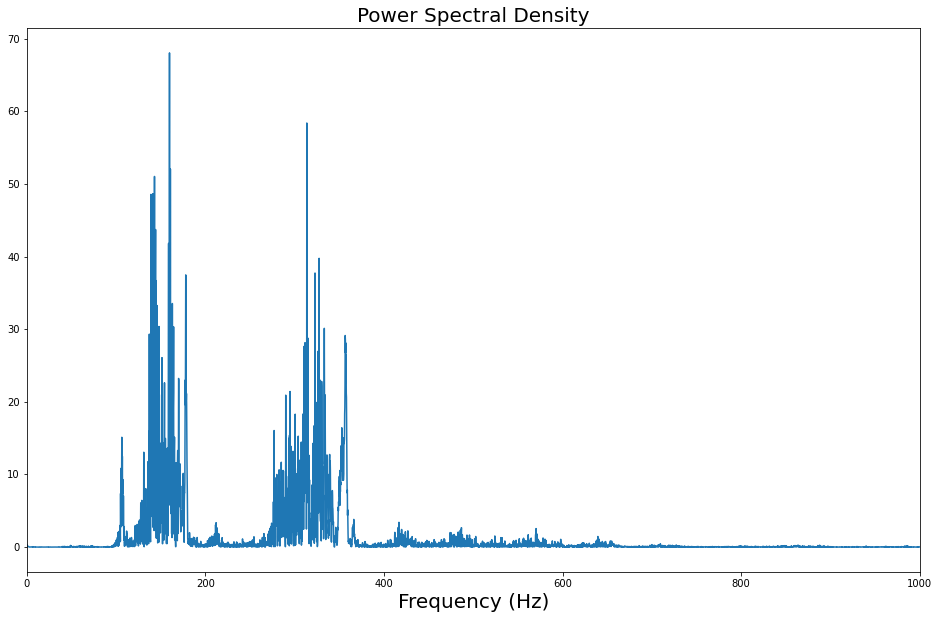

In [ ]:
# Plotting Power Spectral Density
fig, axs = plt.subplots(figsize=(16, 10))
# Plot the Power Spectral Density
axs.plot(freq[L], PSD[L], label='Power Spectral Density')
axs.set_xlim(0, 1000);
# axs.set_ylim(0,20)
axs.set_title('Power Spectral Density',fontsize=20)
axs.set_xlabel('Frequency (Hz)',fontsize=20)
plt.show()

### Trial and Error with PSD and Frequency

After some trial and error I was able to filter out my voice with the sound that is reduced. Since in my attempt to use PSD to zero out the other suspected noise upon analyzing from the PSD graph some frequencies associated my the target sound were also affected.

In [ ]:
##Trial and Error with PSD and Frequency
idx3 = PSD >= 0.8;
idx1 = freq >= -400;
idx2 = freq <=0;
PSD1 = PSD * idx1 *idx2;
PSD2 = PSD * idx1 *idx2 * idx3;
PSD3 = PSD * idx3
fhat1 = fhat *idx2
fhat2 = fhat * idx1 *idx2;
yfilt1 = np.fft.ifft(fhat1).real
yfilt2 = np.fft.ifft(fhat2).real
fhat3 = fhat * idx3
yfilt3 = np.fft.ifft(fhat3).real

### Plotting PSD and the filtered PSD

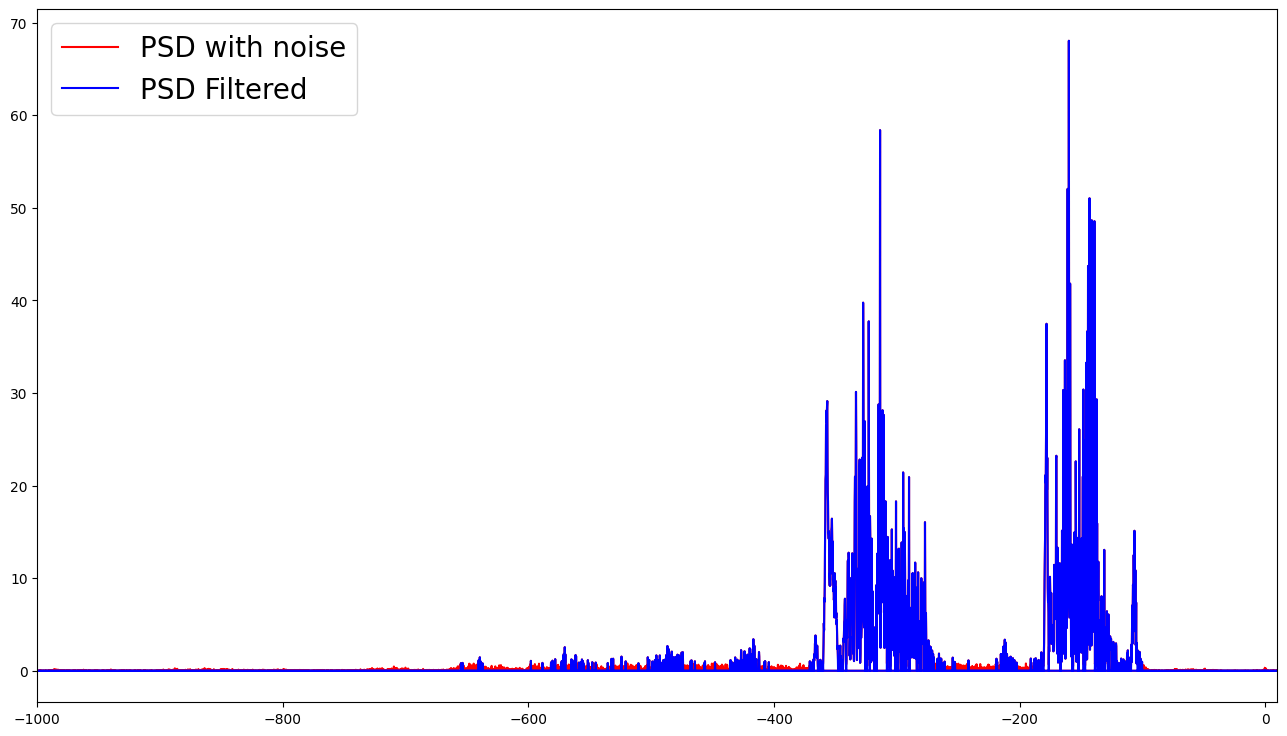

In [ ]:
fig, axes = plt.subplots(figsize=(16,9))
axes.plot(freq,PSD,"r",label="PSD with noise")
axes.plot(freq,PSD3,"b",label="PSD Filtered")
axes.set_xlim(-1000,10);
# axes.set_ylim(0, 10);
plt.legend(fontsize=20)
plt.show()

In [ ]:
yfilt1 = yfilt1[int(start_time * sr):int(end_time * sr)]
filtaudio1 = Audio(data=yfilt1, rate=sr)
yfilt2 = yfilt2[int(start_time * sr):int(end_time * sr)]
filtaudio2 = Audio(data=yfilt2, rate=sr)
yfilt3 = yfilt3[int(start_time * sr):int(end_time * sr)]
filtaudio3 = Audio(data=yfilt3, rate=sr)


##Dislay the following audio for comparison
print("Play the Orignal Audio")
display(rawaudio1)
print("The the audio filtered between frequecies -400Hz and 0Hz")
display(filtaudio2)
print(f"The the audio filtered above the Power Spectral Density greater than or equal 0.8")
display(filtaudio3)

Play the Orignal Audio


The the audio filtered between frequecies -400Hz and 0Hz


The the audio filtered above the Power Spectral Density > 0.8


### Plot the Audio Signal and the Filtered Audio Signal

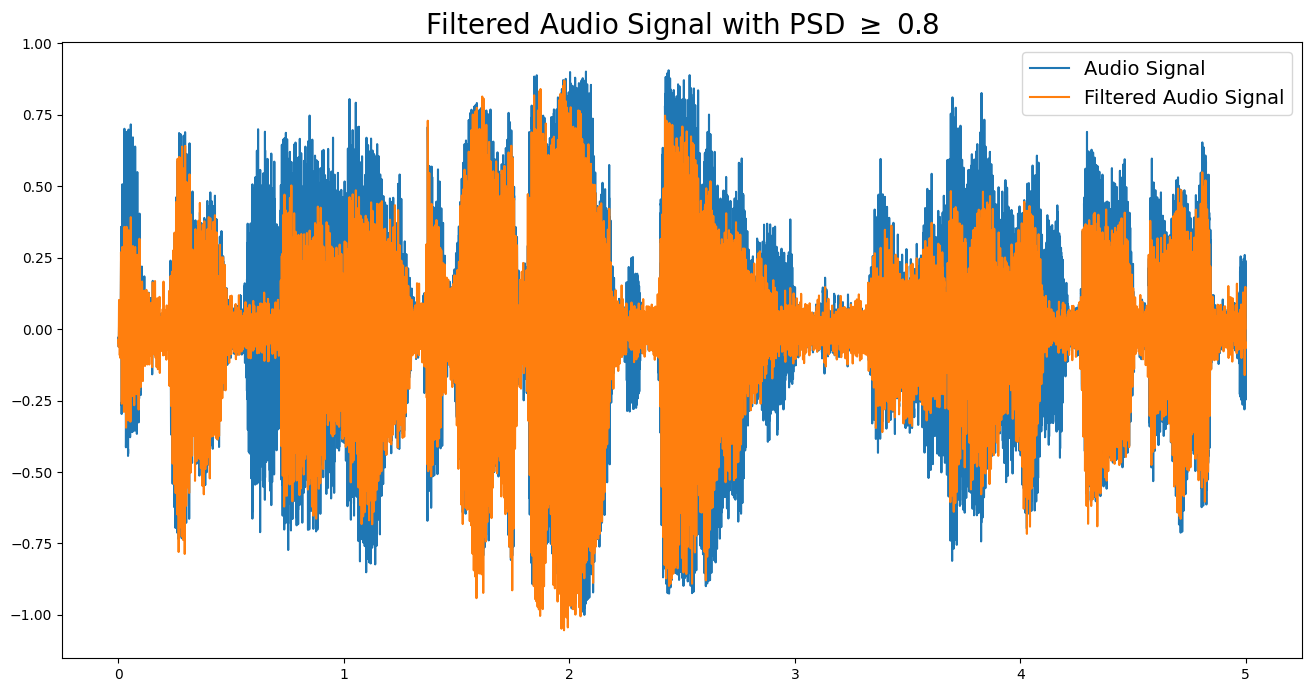

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8))

# Plot the audio signal
axs.set_title(r"Filtered Audio Signal with PSD $\geq$ 0.8",fontsize = 20)
axs.plot(time,yraw,label="Audio Signal")
axs.plot(time,yfilt3,label="Filtered Audio Signal")
plt.legend(fontsize=14)
plt.show()

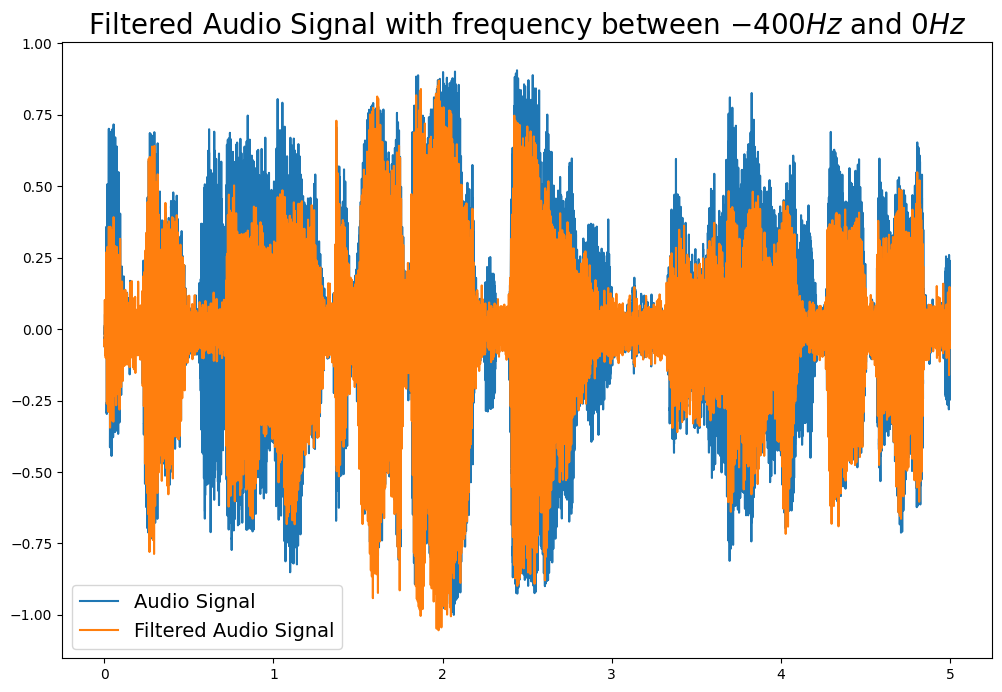

In [ ]:
fig, axs = plt.subplots(figsize=(12, 8))

# Plot the audio signal
axs.set_title(r"Filtered Audio Signal with frequency between $-400Hz$ and $0Hz$",fontsize = 20)
axs.plot(time,yraw,label="Audio Signal")
axs.plot(time,yfilt3,label="Filtered Audio Signal")
plt.legend(fontsize=14)
plt.show()

In [ ]:
#(Optional)
## Export the filtered audio segments
# Save the filtered audio data to a WAV file
sf.write("filtered_audio1.wav", yfilt1, sr)
sf.write("filtered_audio3.wav", yfilt3, sr)